In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import os
import sys
import plotly.graph_objects as go 
dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
from labbiofisica import final_val

In [2]:
path = dir_path+'/data/'

spettri = pd.DataFrame()
for i in ['0','1','2','3','4','5']:
    concentrazione = 'C' + i
    data = pd.read_csv(path + concentrazione + '.dat',header = None, skiprows=1,sep='\t')
    
    spettri['λ'] = data.iloc[:, 0]
    spettri[concentrazione] = data.iloc[:,1]

spettri.tail()

,λ,C0,C1,C2,C3,C4,C5
55,205,-0.02454,-0.02172,-0.02031,-0.02233,-0.01931,-0.01872
56,204,-0.02265,-0.01981,-0.02289,-0.02221,-0.02085,-0.01986
57,203,-0.02256,-0.01913,-0.02492,-0.02548,-0.01868,-0.02221
58,202,-0.02118,-0.02115,-0.02197,-0.02395,-0.02055,-0.02537
59,201,-0.01932,-0.02146,-0.02278,-0.01982,-0.02226,-0.02139


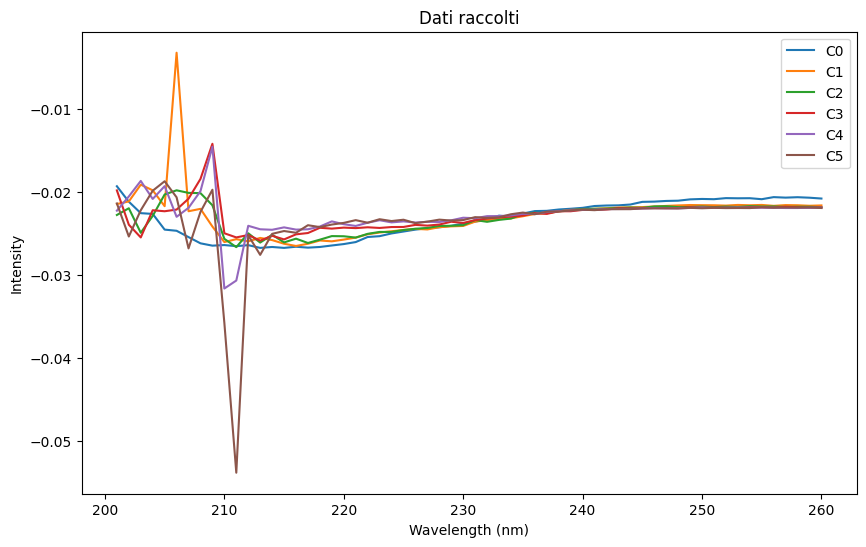

In [3]:
plt.figure(figsize=(10, 6))
for conc in ['C0', 'C1', 'C2','C3', 'C4', 'C5']:
    plt.plot(spettri['λ'], spettri[conc], label=conc)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Dati raccolti')
plt.legend()
plt.show()

### APPAIO LE CODE

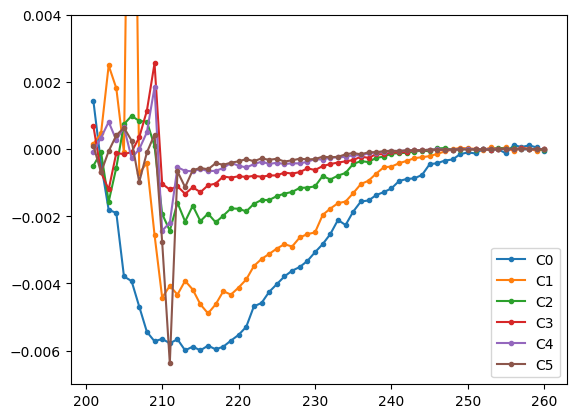

In [4]:
for conc in ['C0','C1', 'C2','C3', 'C4', 'C5']:
    λ =  spettri['λ']
    if conc!= 'C0':
        θ = spettri[conc]/np.float32(conc[1:])
    else:
        θ = spettri[conc]
    mean = θ[λ > 250].mean()
    θ -= mean
    spettri[conc] = θ # diviso per la concentrazione e code appaiate a zero
    plt.plot(λ,θ,marker='.',label=conc)

plt.ylim([-0.007,+0.004])
plt.legend()
plt.show()

In [5]:
λ = spettri['λ']

λmin = 220
λmax = 230

imin,imax = λ[λ == λmin].index[0], λ[λ == λmax].index[0]

Λ = np.arange(λmin,λmax +1)

# Seleziona solo le colonne delle concentrazioni (senza le colonne λ)
spettro_ristretto = spettri.loc[imax:imin, ['C0','C1', 'C2', 'C3', 'C4', 'C5']]

spettro_ristretto = spettro_ristretto.T
spettro_ristretto.columns = spettro_ristretto.columns + 190
spettro_ristretto.insert(0, 'Concentration', spettro_ristretto.index)
spettro_ristretto.reset_index(drop=True, inplace=True)
display(spettro_ristretto)


,Concentration,220,221,222,223,224,225,226,227,228,229,230
0,C0,-0.003070,-0.003330,-0.003510,-0.003620,-0.003790,-0.004020,-0.004250,-0.004580,-0.004680,-0.005290,-0.005530
1,C1,-0.002481,-0.002531,-0.002631,-0.002901,-0.002831,-0.002961,-0.003121,-0.003271,-0.003481,-0.003881,-0.004121
2,C2,-0.001111,-0.001146,-0.001156,-0.001276,-0.001326,-0.001401,-0.001515,-0.001515,-0.001631,-0.001855,-0.001776
3,C3,-0.000623,-0.000573,-0.000686,-0.000730,-0.000700,-0.000783,-0.000786,-0.000823,-0.000796,-0.000830,-0.000810
4,C4,-0.000300,-0.000377,-0.000427,-0.000422,-0.000445,-0.000410,-0.000440,-0.000375,-0.000450,-0.000547,-0.000495
5,C5,-0.000297,-0.000309,-0.000287,-0.000335,-0.000371,-0.000289,-0.000321,-0.000277,-0.000361,-0.000299,-0.000365


In [26]:
fig = go.Figure()
colors = px.colors.sample_colorscale(px.colors.sequential.Plasma, 10)

for idx,i in enumerate(range(λmin,λmax)):
    fig.add_trace(go.Scatter(
        x=spettro_ristretto['Concentration'],
        y=spettro_ristretto[i],
        mode='lines+markers',
        name=str(i)+'nm',
        line=dict(color=colors[idx]),
        marker=dict(color=colors[idx])
    ))

fig.update_layout(
    # yaxis_type='log',
    title='Spettri ristretti (220-230 nm)',
    xaxis_title='Wavelength (nm)',
    yaxis_title='Intensity',
    legend_title='Concentration'
)
fig.show()